# Анализ поведения клиентов «Мегалайн»
Сравнение тарифов «Смарт» и «Ультра»

#Шаг 1. Обзор данных.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [252]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

###Информация о звонках.

In [253]:
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [254]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Данные выглядят адекватно. Таблица содержит 202607 строк.
- Столбец id - индексы строк;
- Столбец call_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users;
- В столбце duration указана продолжительность вызовов.

###Информация о траффике.

In [255]:
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
98428,98428,1330_636,379.89,2018-04-28,1330
115556,115556,1390_4,200.95,2018-08-06,1390
90428,90428,1307_45,675.18,2018-11-03,1307
51399,51399,1175_52,309.81,2018-08-04,1175
100387,100387,1337_424,0.00,2018-02-28,1337


In [256]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица содержит 5 столбцов и 149396 записей.
- В столбце с индексом 0 не имеет имени. Необходимо предположить гипотезу об этих данных или удалить его.
- Столбец id - индексы строк;
- Столбец session_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users.

###Информация о сообщениях.

In [257]:
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
37581,1164_250,2018-08-08,1164
62776,1274_362,2018-06-13,1274
25438,1104_630,2018-11-30,1104
45572,1196_1022,2018-09-30,1196
21599,1091_152,2018-06-04,1091


In [258]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Таблица содержит 3 столбца и 123036 записей.
- Столбец id - индексы строк;
- Столбец session_date содержит даты и должен быть преобразован к типу datetime;
- Столбец user_id связывает данную таблицу с таблицей users.

###Информация о тарифах.

In [259]:
tariffs.info()
tariffs.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


In [260]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Таблица содержит 8 столбцов.
- Столбец tariff_name связывает данную таблицу с таблицей users.

###Информация о пользователях.

In [261]:
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
30,1030,28,NaN,Махачкала,Мариетта,Русанова,2018-05-23,smart
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
212,1212,21,NaN,Саранск,Руслан,Пономарев,2018-11-09,smart


In [262]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Таблица содержит 8 столбцов.

- Столбец id - индексы строк;
- Столбцы churn_date(дата прекращения) и reg_date(дата подключения) содержат даты и должны быть преобразованы к типу datetime.

#Шаг 2. Подготовка данных.


###Данные о пользователях.

In [263]:
# Установка столбца user_id в качестве индекса с проверкой на дубликаты
users.set_index(keys='user_id', verify_integrity=True, inplace=True)
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


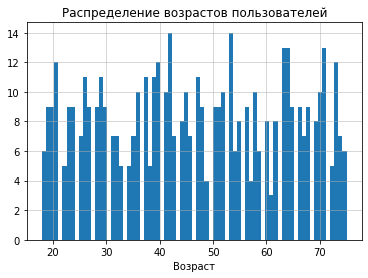

In [264]:
#Визуальная оценка распределения данных по возрасту
users['age'].hist(bins=75)
plt.xlabel('Возраст');
plt.grid(linewidth=0.5)
plt.title('Распределение возрастов пользователей')
plt.show()

Распределение по возрасту выглядит адекватно.

In [265]:
#Приведение столбца churn_date к типу datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_date'].describe(datetime_is_numeric=True)

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

In [266]:
#Проверка содержания столбца city
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [267]:
#Приведение столбца reg_date к типу datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_date'].describe(datetime_is_numeric=True)

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

In [268]:
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


###Данные о звонках.

In [269]:
# Установка столбца id в качестве индекса с проверкой на дубликаты
calls.set_index(keys='id', verify_integrity=True, inplace=True)
calls.head()

,call_date,duration,user_id
id,,,
1000_0,2018-07-25,0.00,1000
1000_1,2018-08-17,0.00,1000
1000_2,2018-06-11,2.85,1000
1000_3,2018-09-21,13.80,1000
1000_4,2018-12-15,5.18,1000


In [270]:
#Приведение столбца call_date к типу datetime
calls['call_date'].describe()

count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object

In [271]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date'].describe(datetime_is_numeric=True)

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

In [272]:
#Исследование аномалий в столбце duration
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

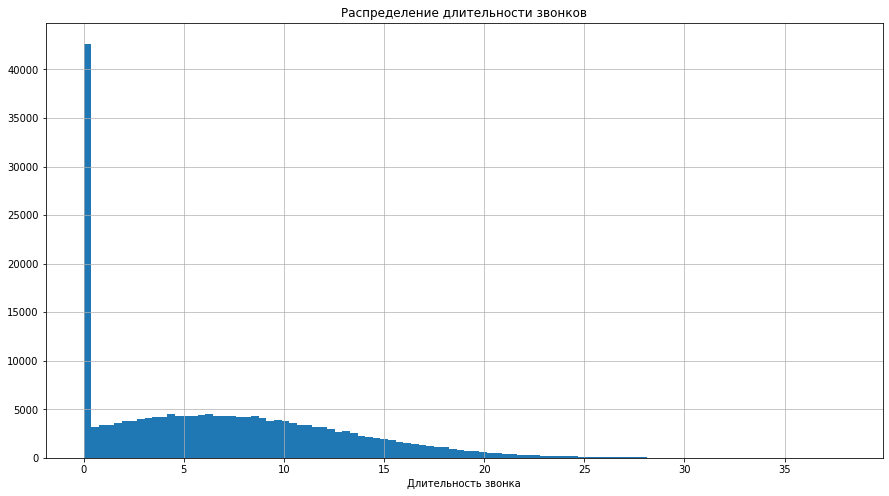

In [273]:
#Визуальная оценка распределения данных
calls['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.7)
plt.title('Распределение длительности звонков')
plt.show()

In [274]:
print('Количество записей с длительность звонка, равной 0 - {} ({:.2%})'.format(len(calls.query('duration == 0')), len(calls.query('duration == 0')) / len(calls)), end='\n\n')


Количество записей с длительность звонка, равной 0 - 39613 (19.55%)



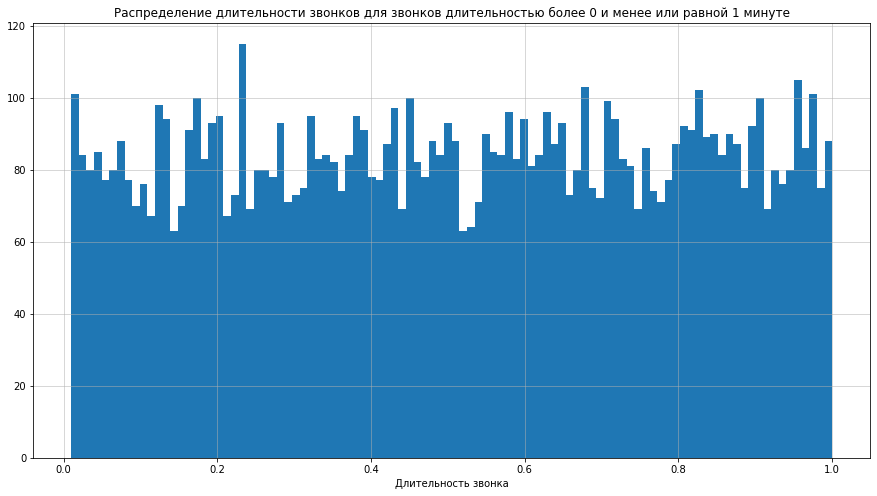

In [275]:
#Визуальная оценка распределения данных
calls.query('0 < duration <= 1')['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков длительностью более 0 и менее или равной 1 минуте')
plt.show()

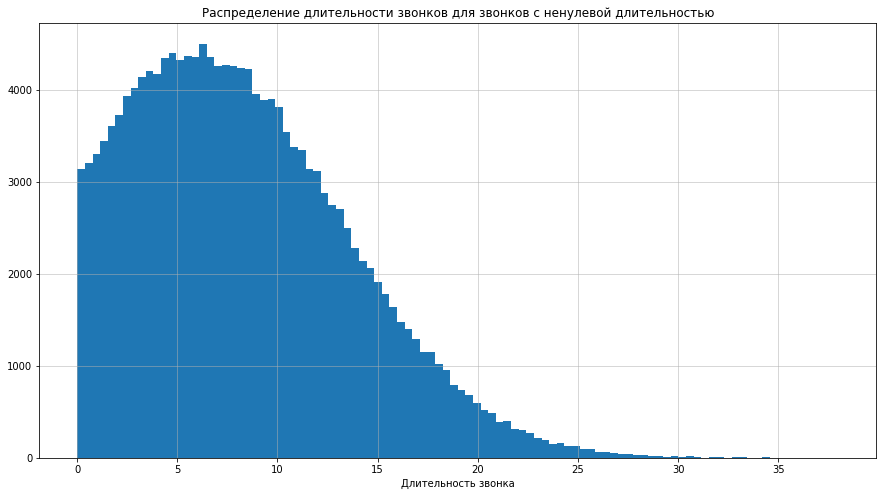

In [276]:
#Визуальная оценка распределения данных
calls.query('duration != 0')['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков с ненулевой длительностью')
plt.show()

###Данные о сообщениях.

In [277]:
#Установка столбца id в качестве индекса с проверкой на дубликаты
messages.set_index(keys='id', verify_integrity=True, inplace=True)
messages.head()

,message_date,user_id
id,,
1000_0,2018-06-27,1000
1000_1,2018-10-08,1000
1000_2,2018-08-04,1000
1000_3,2018-06-16,1000
1000_4,2018-12-05,1000


In [278]:
#Приведение столбца message_date к типу datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date'].describe(datetime_is_numeric=True)

count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

###Данные о траффике.

In [279]:
#Удаление столбца с индексом 0
internet.drop(columns=[internet.columns[0]], inplace=True)
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [280]:
#Установка столбца id в качестве индекса с проверкой на дубликаты
internet.set_index(keys='id', verify_integrity=True, inplace=True)
internet.head()

,mb_used,session_date,user_id
id,,,
1000_0,112.95,2018-11-25,1000
1000_1,1052.81,2018-09-07,1000
1000_2,1197.26,2018-06-25,1000
1000_3,550.27,2018-08-22,1000
1000_4,302.56,2018-09-24,1000


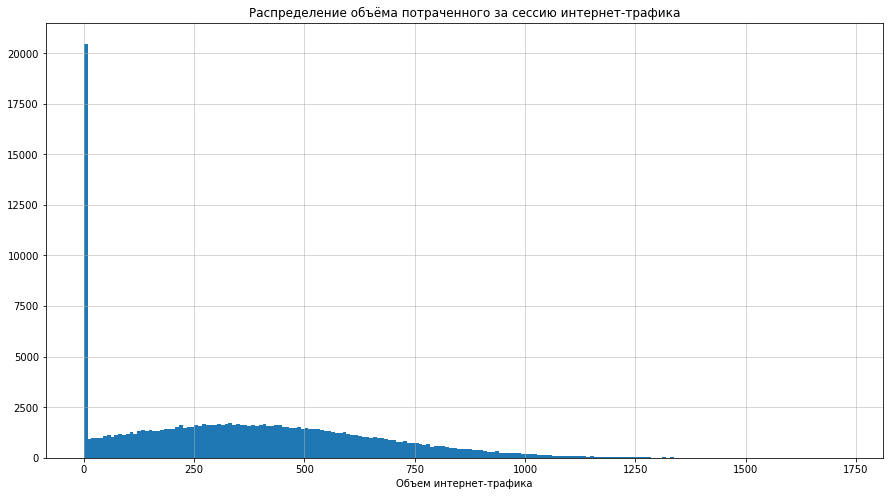

In [281]:
#Визуальная оценка распределения данных
internet['mb_used'].hist(bins=200, figsize=(15, 8))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объёма потраченного за сессию интернет-трафика')
plt.show()

In [282]:
print('Количество записей с объмом трафика сессии, равным 0 - {} ({:.2%})'.format(len(internet.query('mb_used == 0')), len(internet.query('mb_used == 0')) / len(internet)), end='\n\n')

Количество записей с объмом трафика сессии, равным 0 - 19598 (13.12%)



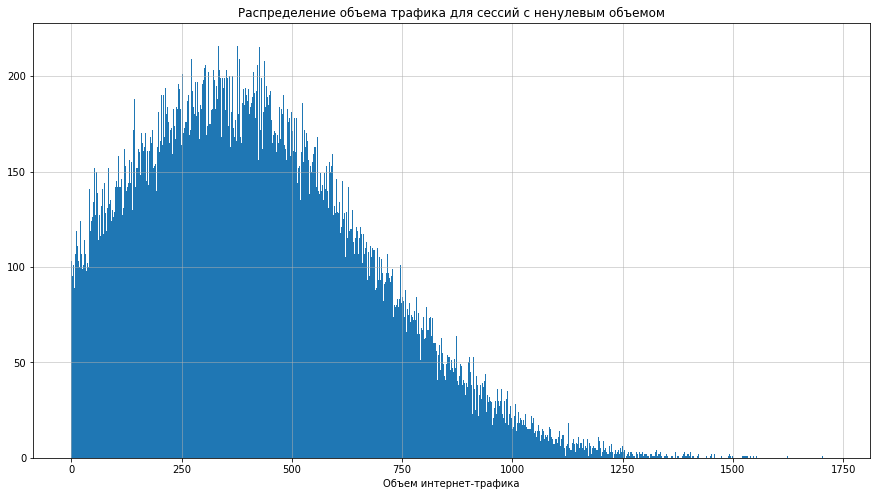

In [283]:
#Визуальная оценка распределения данных
internet.query('mb_used != 0')['mb_used'].hist(bins=1750, figsize=(15, 8))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объема трафика для сессий с ненулевым объемом')
plt.show()

In [284]:
#Расчет количества сессий с трафиком 0 Мб для каждого пользователя
zero_mb_used_pivot = internet.query('mb_used == 0').pivot_table(index='user_id', values='mb_used', aggfunc='count')
zero_mb_used_pivot.columns = ['count_zero']
zero_mb_used_pivot

,count_zero
user_id,
1000,14
1001,14
1002,72
1003,2
1004,22
...,...
1495,10
1496,141
1497,16


In [285]:
#Расчет количества сессий для каждого пользователя
mb_used_pivot = internet.pivot_table(index='user_id', values='mb_used', aggfunc='count')
mb_used_pivot.columns = ['count']
mb_used_pivot

,count
user_id,
1000,211
1001,96
1002,369
1003,104
1004,300
...,...
1495,254
1496,834
1497,121


In [286]:
#Совмещение расчетов
mb_used_pivot = mb_used_pivot.merge(zero_mb_used_pivot, left_on='user_id', right_on='user_id', how='left')
mb_used_pivot

,count,count_zero
user_id,,
1000,211,14.0
1001,96,14.0
1002,369,72.0
1003,104,2.0
1004,300,22.0
...,...,...
1495,254,10.0
1496,834,141.0
1497,121,16.0


In [287]:
#Расчет соотношения количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям
mb_used_pivot['ratio'] = mb_used_pivot['count_zero'] / mb_used_pivot['count']
mb_used_pivot

,count,count_zero,ratio
user_id,,,
1000,211,14.0,0.066351
1001,96,14.0,0.145833
1002,369,72.0,0.195122
1003,104,2.0,0.019231
1004,300,22.0,0.073333
...,...,...,...
1495,254,10.0,0.039370
1496,834,141.0,0.169065
1497,121,16.0,0.132231


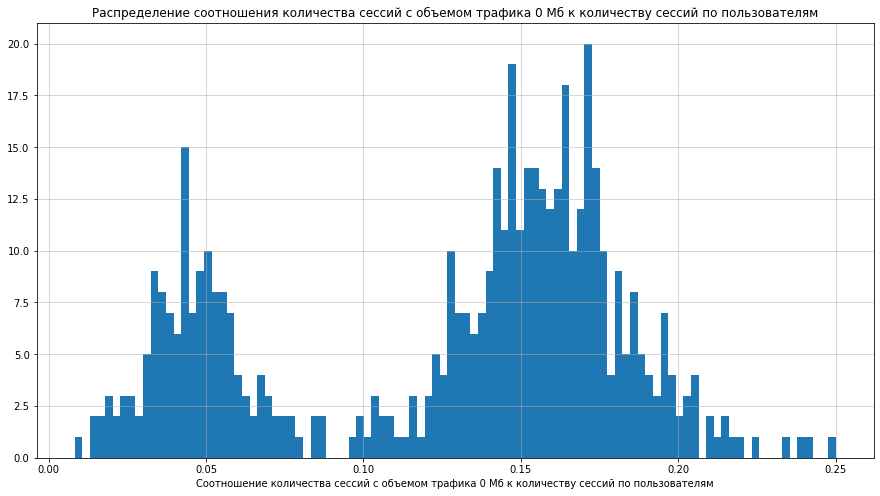

In [288]:
#Визуальная оценка распределения полученных значений
mb_used_pivot['ratio'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Соотношение количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям');
plt.grid(linewidth=0.5)
plt.title('Распределение соотношения количества сессий с объемом трафика 0 Мб к количеству сессий по пользователям')
plt.show()

In [289]:
#Добавление столбца ratio в таблицу users
users = users.merge(mb_used_pivot['ratio'], left_index=True, right_index=True, how='left')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age         500 non-null    int64         
 1   churn_date  38 non-null     datetime64[ns]
 2   city        500 non-null    object        
 3   first_name  500 non-null    object        
 4   last_name   500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
 7   ratio       494 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 35.2+ KB


In [290]:
#Проверка гипотезы о том, что 2 полученных нормальных распределения относятся к 2 тарифам
users.groupby('tariff')['ratio'].mean()

tariff
smart    0.159255
ultra    0.047244
Name: ratio, dtype: float64

In [291]:
#Приведение столбца session_date к типу datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['session_date'].describe(datetime_is_numeric=True)

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

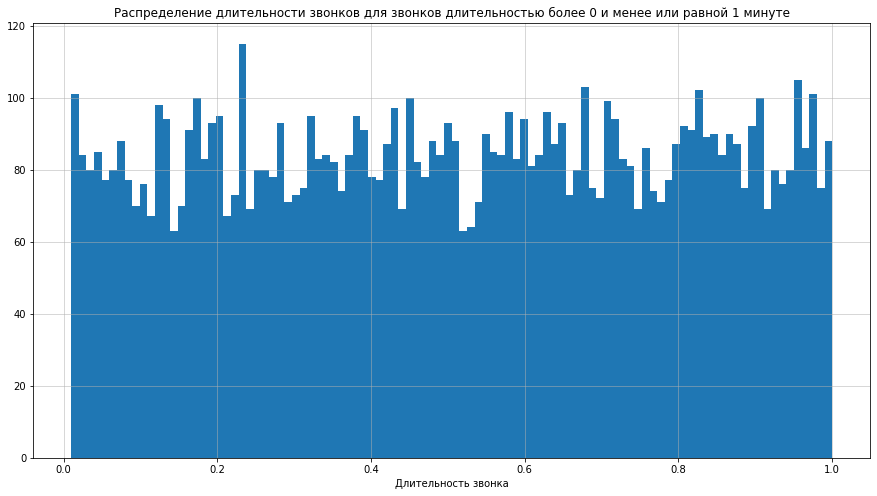

In [292]:
#Замена 0 для длительности разговоров и объема интеренет-сессий
calls[(calls['duration'] > 0) & (calls['duration'] <= 1)]['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков длительностью более 0 и менее или равной 1 минуте')
plt.show()

In [293]:
import random

# Функция для получения равномерно распределенного случайного значения в диапазоне от минимума до максимума (в диапазоне (0, 1]).
def get_short_calls_duration_mean(row):
    duration = calls[
        (calls['user_id'] == row['user_id']) &
        (calls['duration'] > 0) &
        (calls['duration'] <= 1)
    ]['duration']
    
    # Проверка на отсуствие значений в диапазоне (0, 1]
    if len(duration) == 0:
        return random.uniform(0, 1)
    
    return random.uniform(duration.min(), duration.max())

In [294]:
#Замена значений, равных 0
calls.loc[calls['duration'] == 0, 'duration'] = calls[calls['duration'] == 0].apply(get_short_calls_duration_mean, axis=1)

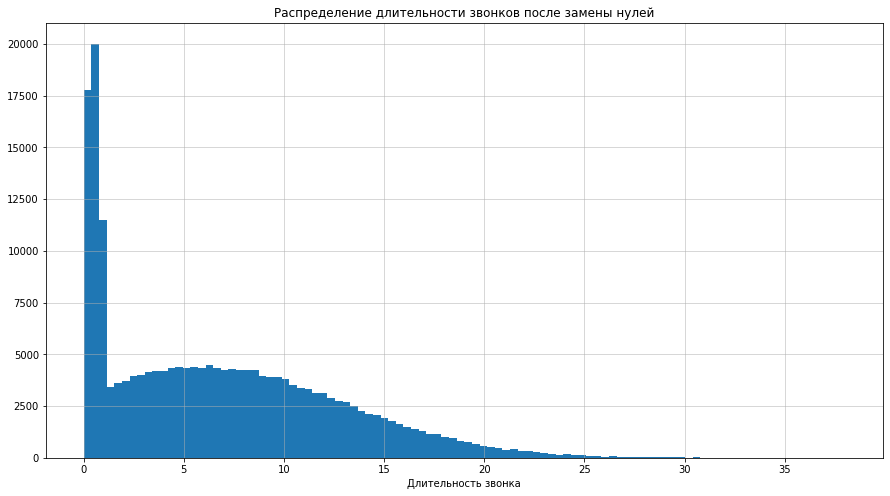

In [298]:
calls['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков после замены нулей')
plt.show()

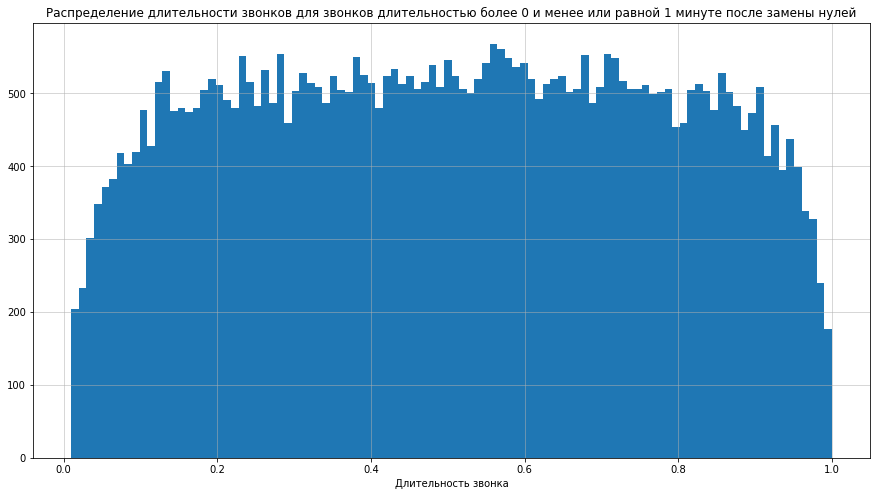

In [299]:
calls.query('duration <= 1')['duration'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Длительность звонка');
plt.grid(linewidth=0.5)
plt.title('Распределение длительности звонков для звонков длительностью более 0 и менее или равной 1 минуте после замены нулей')
plt.show()

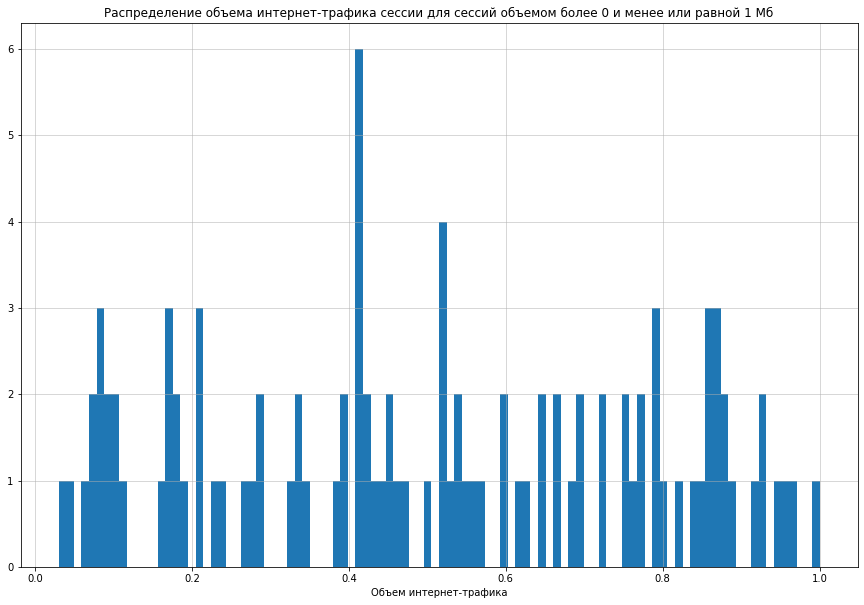

In [300]:
internet[(internet['mb_used'] > 0) & (internet['mb_used'] <= 1)]['mb_used'].hist(bins=100, figsize=(15, 8))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объема интернет-трафика сессии для сессий объемом более 0 и менее или равной 1 Мб')
plt.show()

In [302]:
#Функция для получения равномерно распределенного случайного значения в диапазоне от минимума до максимума (в диапазоне (0, 1]).
def get_random_uniform_short_session_mb_used(row):
    mb_used = internet[
        (internet['user_id'] == row['user_id']) &
        (internet['mb_used'] > 0) &
        (internet['mb_used'] <= 1)
    ]['mb_used']
    
    # Проверка на отсуствие значений в диапазоне (0, 1]
    if len(mb_used) == 0:
        return random.uniform(0, 1)
    
    return random.uniform(mb_used.min(), mb_used.max())

In [303]:
#Замена значений, равных 0
internet.loc[internet['mb_used'] == 0, 'mb_used'] = internet[internet['mb_used'] == 0].apply(get_random_uniform_short_session_mb_used, axis=1)

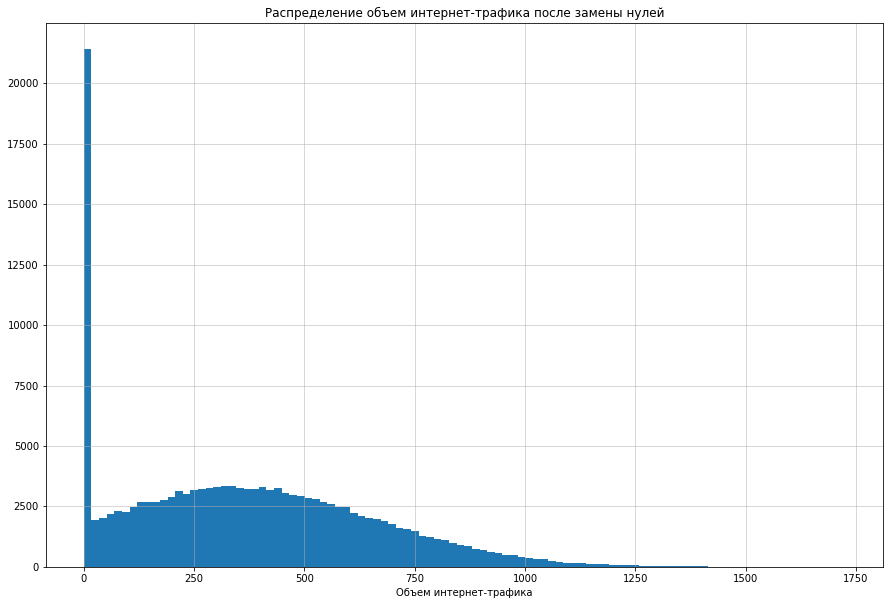

In [304]:
internet['mb_used'].hist(bins=100, figsize=(15, 10))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объем интернет-трафика после замены нулей')
plt.show()

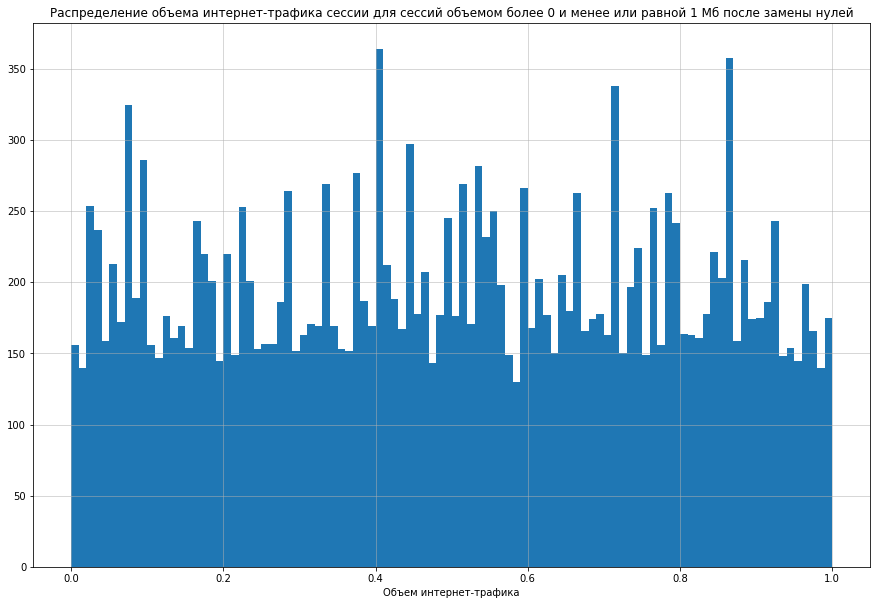

In [305]:
internet.query('mb_used <= 1')['mb_used'].hist(bins=100, figsize=(15, 10))
plt.xlabel('Объем интернет-трафика');
plt.grid(linewidth=0.5)
plt.title('Распределение объема интернет-трафика сессии для сессий объемом более 0 и менее или равной 1 Мб после замены нулей')
plt.show()

###Дополнительные расчеты для каждого пользователя.

In [307]:
#Количество сделанных звонков и израсходованных минут разговора по месяцам
#Получение месяца звонка для дальнейших расчетов
calls['call_month'] = calls['call_date'].dt.month
#Округление продолжнительность звонка в большую сторону до 1 минуты
calls['duration_ceiled'] = calls['duration'].apply(np.ceil)

In [308]:
#Создание таблицы с расчетом количества сделанных звонков и израсходованных минут разговора по месяцам
calls_pivot = calls.pivot_table(index=['user_id', 'call_month'], values='duration_ceiled', aggfunc=['count', 'sum'])
calls_pivot.columns = ['calls_made', 'minutes_spent']

#Переименование индекса для дальнешего удобства объединения данных
calls_pivot.rename_axis(index={'call_month': 'month'}, inplace=True)

calls_pivot

calls_made  minutes_spent
user_id month                           
1000    5              22          164.0
        6              43          187.0
        7              47          346.0
        8              52          418.0
        9              58          478.0
...                   ...            ...
1498    10             41          258.0
1499    9               9           71.0
        10             68          473.0
        11             74          624.0
        12             69          505.0

[3174 rows x 2 columns]

In [309]:
#Количество отправленных сообщений по месяцам
#Получение месяца сообщения для дальнейших расчетов
messages['message_month'] = messages['message_date'].dt.month

# Создание таблицы с расчетом количества отправленных сообщений по месяцам
messages_pivot = messages.pivot_table(index=['user_id', 'message_month'], values='message_date', aggfunc='count')
messages_pivot.columns = ['messages_sent']

#Переименование индекса для дальнешего удобства объединения данных
messages_pivot.rename_axis(index={'message_month': 'month'}, inplace=True)

messages_pivot

messages_sent
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

In [310]:
#Объем израсходованного интернет-трафика по месяцам
#Получение месяца сессии для дальнейших расчетов
internet['session_month'] = internet['session_date'].dt.month

# Округление объема трафика сессии в большую сторону до 1 Мб
internet['mb_used_ceiled'] = internet['mb_used'].apply(np.ceil)

#Создание таблицы с расчетом объема израсходованного интернет-трафика по месяцам
internet_pivot = internet.pivot_table(index=['user_id', 'session_month'], values='mb_used_ceiled', aggfunc='sum')
internet_pivot.columns = ['mb_spent']

#Переименование индекса для дальнешего удобства объединения данных
internet_pivot.rename_axis(index={'session_month': 'month'}, inplace=True)

internet_pivot

mb_spent
user_id month          
1000    5        2257.0
        6       23262.0
        7       14017.0
        8       14072.0
        9       14583.0
...                 ...
1498    10      20614.0
1499    9        1849.0
        10      17824.0
        11      17994.0
        12      13082.0

[3203 rows x 1 columns]

In [311]:
#Помесячная выручка с каждого пользователя
#Объединение данных
full_pivot = calls_pivot.merge(messages_pivot, left_index=True, right_index=True, how='outer')
full_pivot = full_pivot.merge(internet_pivot, left_index=True, right_index=True, how='outer')

#Заполнение пропусков, означающих отсутсвие действий, нулями
full_pivot.fillna(0, inplace=True)

#Приведение к целочисленному типу для экономии памяти
full_pivot = full_pivot.apply(pd.DataFrame.astype, dtype='int')

full_pivot

calls_made  minutes_spent  messages_sent  mb_spent
user_id month                                                    
1000    5              22            164             22      2257
        6              43            187             60     23262
        7              47            346             75     14017
        8              52            418             81     14072
        9              58            478             57     14583
...                   ...            ...            ...       ...
1498    10             41            258             42     20614
1499    9               9             71             11      1849
        10             68            473             48     17824
        11             74            624             59     17994
        12             69            505             66     13082

[3214 rows x 4 columns]

In [312]:
#Функция для расчета помесячной выручки с каждого пользователя

def get_revenue(row):
#     Получение информации о тарифе клиента
    tariff_info = tariffs[tariffs['tariff_name'] == users.loc[row.name[0]]['tariff']]
    
    revenue = 0

    remaining_minutes = int(row['minutes_spent'] - tariff_info['minutes_included'])
    if remaining_minutes > 0:
        revenue += remaining_minutes * tariff_info['rub_per_minute']
              
    remaining_messages = int(row['messages_sent'] - tariff_info['messages_included'])
    if remaining_messages > 0:
        revenue += remaining_messages *  tariff_info['rub_per_message']
           
    remaining_mb = int(row['mb_spent'] - tariff_info['mb_per_month_included'])
    if remaining_mb > 0:
        revenue += np.ceil(remaining_mb / 1024) *  tariff_info['rub_per_gb']
    
    return int(revenue + tariff_info['rub_monthly_fee'])

In [314]:
#Расчет помесячной выручки с каждого пользователя 
full_pivot['revenue'] = full_pivot.apply(get_revenue, axis=1)

full_pivot

calls_made  minutes_spent  messages_sent  mb_spent  revenue
user_id month                                                             
1000    5              22            164             22      2257     1950
        6              43            187             60     23262     1950
        7              47            346             75     14017     1950
        8              52            418             81     14072     1950
        9              58            478             57     14583     1950
...                   ...            ...            ...       ...      ...
1498    10             41            258             42     20614     1750
1499    9               9             71             11      1849      550
        10             68            473             48     17824     1150
        11             74            624             59     17994     1549
        12             69            505             66     13082      613

[3214 rows x 5 columns]

###Выводы.
В ходе проверки данных на аномалии в столбцах с длительностью звонков и объемом интернет-трафика сессий были обнаружены значительные выбросы - в указанных столбцах 20% и 13% значений, соответственно, равны 0. Первыми, данные аномалии были обнаружены в столбце calls.duration. Было принято решение, что это несостоявшиеся звонки (пропущенные, сброшенные и т.п.), учитывая, что доля таких звонков для каждого пользователя имеет нормальное распределение. Но, после этого, такая же аномалия была обнаружена в столбце internet.mb_used, где не может быть не состоявшихся интернет сессий, а распределение таких сессий по пользователям является нормальным, причем, четко разделяется по двум тарифам. Было решено заменить нулевый данные на данные в диапазоне от 0 до 1.

#Шаг 3. Анализ данных.

In [315]:
#Создание таблицы данными по пользователям тарифа Smart
smart_users = full_pivot.copy().loc[list(filter(lambda ID: ID in full_pivot.index, tuple(users[users['tariff'] == 'smart'].index)))]
smart_users


calls_made  minutes_spent  messages_sent  mb_spent  revenue
user_id month                                                             
1001    11             59            444              0     18460     1350
        12             63            430              0     14059      550
1002    6              15            118              4     10878      550
        7              26            219             11     17615     1150
        8              42            294             13     20357     1550
...                   ...            ...            ...       ...      ...
1498    10             41            258             42     20614     1750
1499    9               9             71             11      1849      550
        10             68            473             48     17824     1150
        11             74            624             59     17994     1549
        12             69            505             66     13082      613

[2229 rows x 5 columns]

In [316]:
# Создание таблицы данными по пользователям тарифа Ultra
ultra_users = full_pivot.copy().loc[list(filter(lambda ID: ID in full_pivot.index, tuple(users[users['tariff'] == 'ultra'].index)))]
ultra_users

calls_made  minutes_spent  messages_sent  mb_spent  revenue
user_id month                                                             
1000    5              22            164             22      2257     1950
        6              43            187             60     23262     1950
        7              47            346             75     14017     1950
        8              52            418             81     14072     1950
        9              58            478             57     14583     1950
...                   ...            ...            ...       ...      ...
1495    8              17             96             13      2616     1950
        9             112            830             82     33107     2400
        10            152           1056             82     29399     1950
        11            129            971             79     38973     3300
        12            155           1066             84     23451     1950

[985 rows x 5 columns]

###Звонки

In [317]:
#Тариф SMART
smart_calls_mean = smart_users['minutes_spent'].mean()
print('Среднее количество потраченых за месяц минут - {:.2f}'.format(smart_calls_mean))
smart_calls_variance = np.var(smart_users['minutes_spent'], ddof=1)
print('Дисперсия количества потраченых за месяц минут - {:.2f}'.format(smart_calls_variance))
smart_calls_standard_deviation = np.sqrt(smart_calls_variance)
print('Стандартное отклонение количества потраченых за месяц минут - {:.2f}'.format(smart_calls_standard_deviation))

Среднее количество потраченых за месяц минут - 429.45
Дисперсия количества потраченых за месяц минут - 37974.77
Стандартное отклонение количества потраченых за месяц минут - 194.87


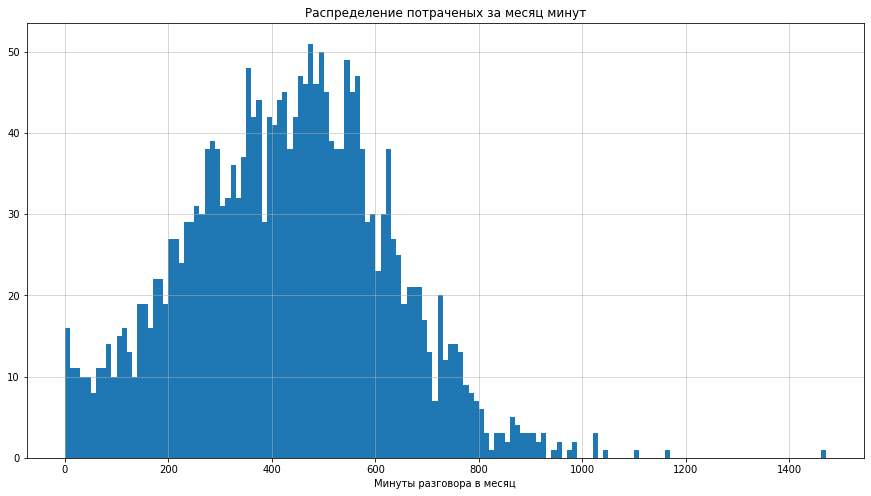

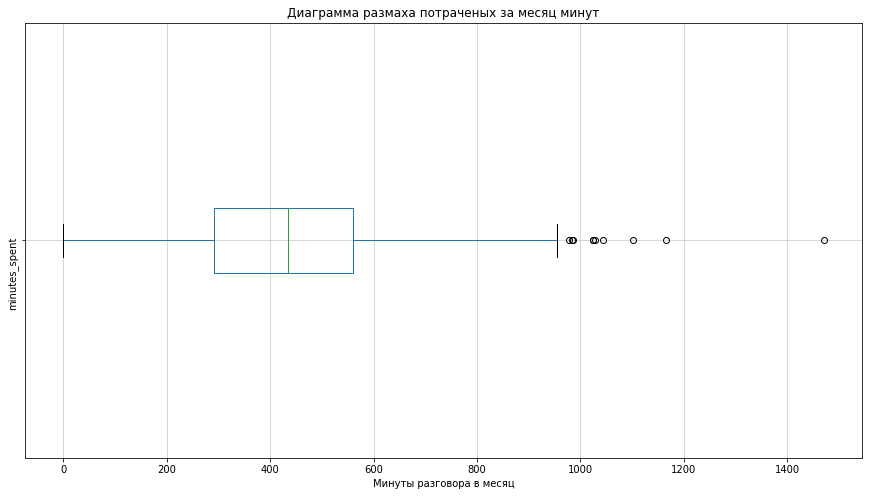

In [318]:
smart_users['minutes_spent'].hist(bins=147, figsize=(15, 8))
plt.xlabel('Минуты разговора в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение потраченых за месяц минут')
plt.show()

smart_users.boxplot(column='minutes_spent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Минуты разговора в месяц');
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха потраченых за месяц минут')
plt.show()

In [319]:
print('Количество минут в месяц, необходимое для удовлетворения нужд 99% клиентов - {:.2f}'.format(smart_calls_mean + 3 * smart_calls_standard_deviation))

Количество минут в месяц, необходимое для удовлетворения нужд 99% клиентов - 1014.06


In [320]:
#Тариф ULTRA
ultra_calls_mean = ultra_users['minutes_spent'].mean()
print('Среднее количество потраченых за месяц минут - {:.2f}'.format(ultra_calls_mean))
ultra_calls_variance = np.var(ultra_users['minutes_spent'], ddof=1)
print('Дисперсия количества потраченых за месяц минут - {:.2f}'.format(ultra_calls_variance))
ultra_calls_standard_deviation = np.sqrt(ultra_calls_variance)
print('Стандартное отклонение количества потраченых за месяц минут - {:.2f}'.format(ultra_calls_standard_deviation))

Среднее количество потраченых за месяц минут - 540.78
Дисперсия количества потраченых за месяц минут - 106105.73
Стандартное отклонение количества потраченых за месяц минут - 325.74


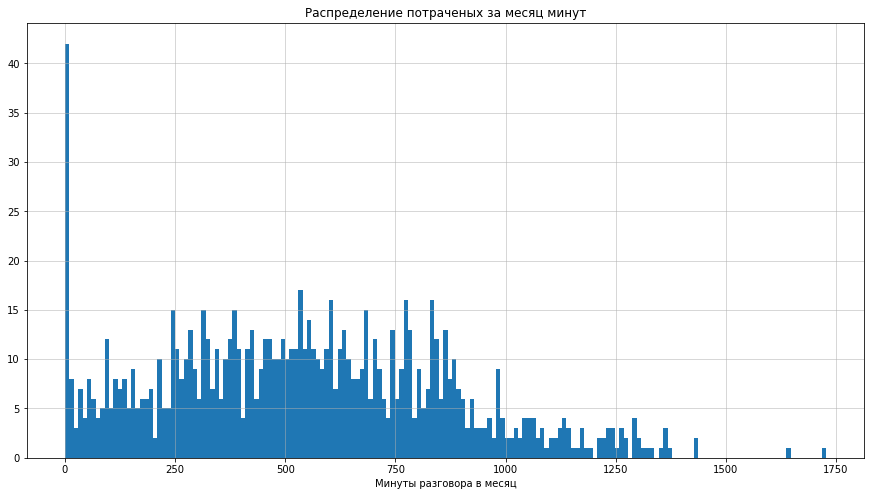

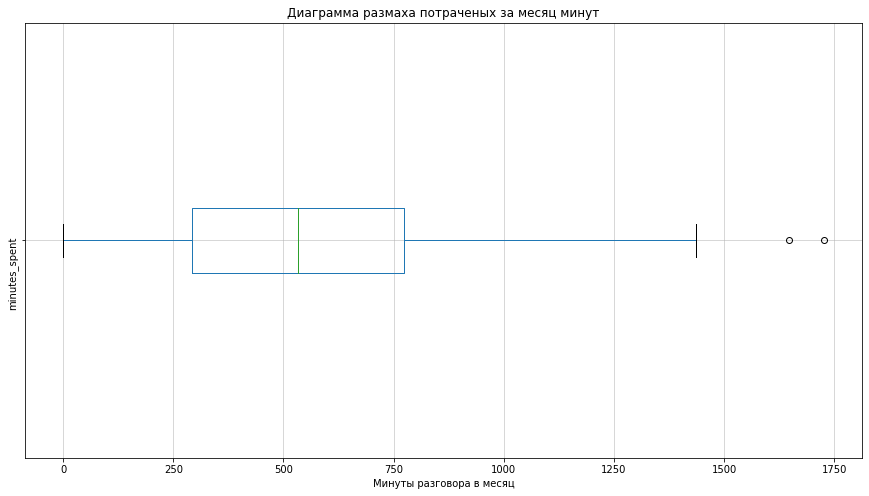

In [321]:
ultra_users['minutes_spent'].hist(bins=173, figsize=(15, 8))
plt.xlabel('Минуты разговора в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение потраченых за месяц минут')
plt.show()

ultra_users.boxplot(column='minutes_spent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Минуты разговора в месяц');
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха потраченых за месяц минут')
plt.show()

In [322]:
print('Количество минут, необходимое для удовлетворения нужд 99% клиентов - {:.2f}'.format(ultra_calls_mean + 3 * ultra_calls_standard_deviation))

Количество минут, необходимое для удовлетворения нужд 99% клиентов - 1518.00


###Сообщения

In [323]:
#Тариф SMART
smart_messages_mean = smart_users['messages_sent'].mean()
print('Среднее количество посланных за месяц сообщений - {:.2f}'.format(smart_messages_mean))
smart_messages_variance = np.var(smart_users['messages_sent'], ddof=1)
print('Дисперсия количества посланных за месяц сообщений - {:.2f}'.format(smart_messages_variance))
smart_messages_standard_deviation = np.sqrt(smart_messages_variance)
print('Стандартное отклонение количества посланных за месяц сообщений - {:.2f}'.format(smart_messages_standard_deviation))

Среднее количество посланных за месяц сообщений - 33.38
Дисперсия количества посланных за месяц сообщений - 796.81
Стандартное отклонение количества посланных за месяц сообщений - 28.23


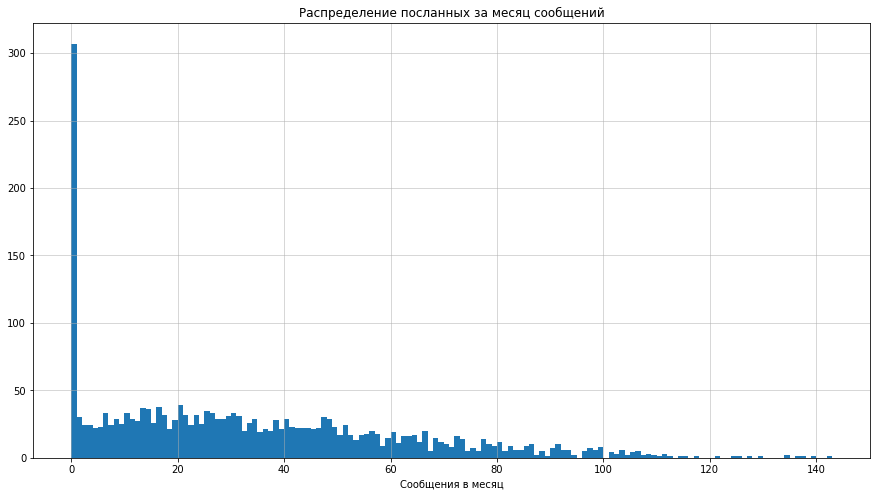

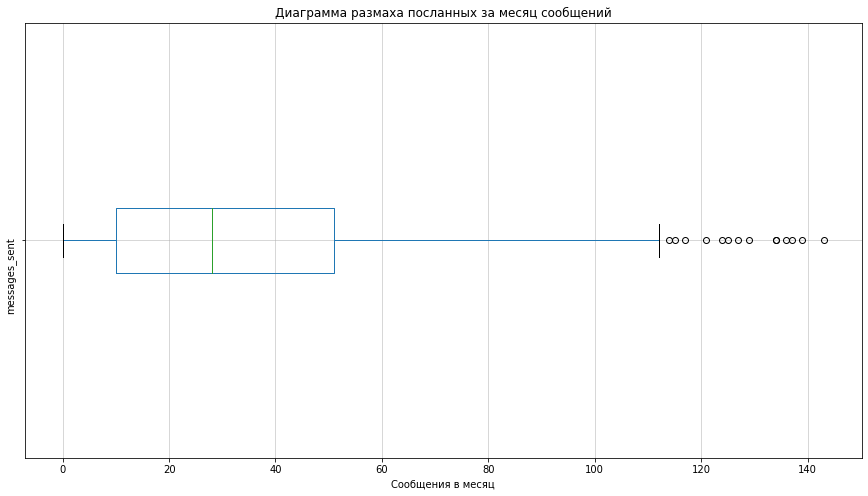

In [324]:
smart_users['messages_sent'].hist(bins=143, figsize=(15, 8))
plt.xlabel('Сообщения в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение посланных за месяц сообщений')
plt.show()

smart_users.boxplot(column='messages_sent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Сообщения в месяц');
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха посланных за месяц сообщений')
plt.show()

In [325]:
#Тариф ULTRA
ultra_messages_mean = ultra_users['messages_sent'].mean()
print('Среднее количество посланных за месяц сообщений - {:.2f}'.format(ultra_messages_mean))
ultra_messages_variance = np.var(ultra_users['messages_sent'], ddof=1)
print('Дисперсия количества посланных за месяц сообщений - {:.2f}'.format(ultra_messages_variance))
ultra_messages_standard_deviation = np.sqrt(ultra_messages_variance)
print('Стандартное отклонение количества посланных за месяц сообщений - {:.2f}'.format(ultra_messages_standard_deviation))

Среднее количество посланных за месяц сообщений - 49.36
Дисперсия количества посланных за месяц сообщений - 2285.27
Стандартное отклонение количества посланных за месяц сообщений - 47.80


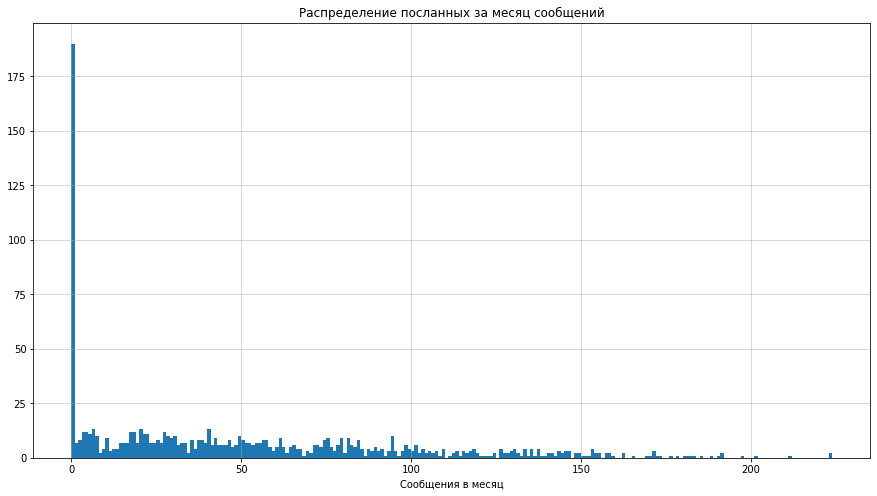

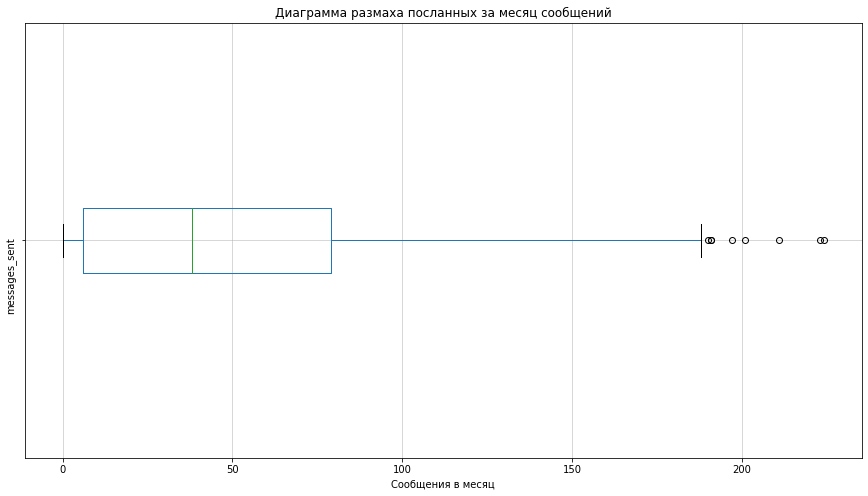

In [327]:
ultra_users['messages_sent'].hist(bins=224, figsize=(15, 8))
plt.xlabel('Сообщения в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение посланных за месяц сообщений')
plt.show()

ultra_users.boxplot(column='messages_sent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Сообщения в месяц');
plt.grid(linewidth=0.5)
plt.title('Диаграмма размаха посланных за месяц сообщений')
plt.show()

###Траффик

In [328]:
#Тариф SMART
#Создание столбца трафиком, переведенным в Гб
smart_users['gb_spent'] = smart_users['mb_spent'] / 1024
smart_internet_mean = smart_users['gb_spent'].mean()
print('Средний объем израсходованного за месяц интернет-трафика - {:.2f}'.format(smart_internet_mean))
smart_internet_variance = np.var(smart_users['gb_spent'], ddof=1)
print('Дисперсия израсходованного за месяц интернет-трафика - {:.2f}'.format(smart_internet_variance))
smart_internet_standard_deviation = np.sqrt(smart_internet_variance)
print('Стандартное отклонение израсходованного за месяц интернет-трафика - {:.2f}'.format(smart_internet_standard_deviation))

Средний объем израсходованного за месяц интернет-трафика - 15.86
Дисперсия израсходованного за месяц интернет-трафика - 32.97
Стандартное отклонение израсходованного за месяц интернет-трафика - 5.74


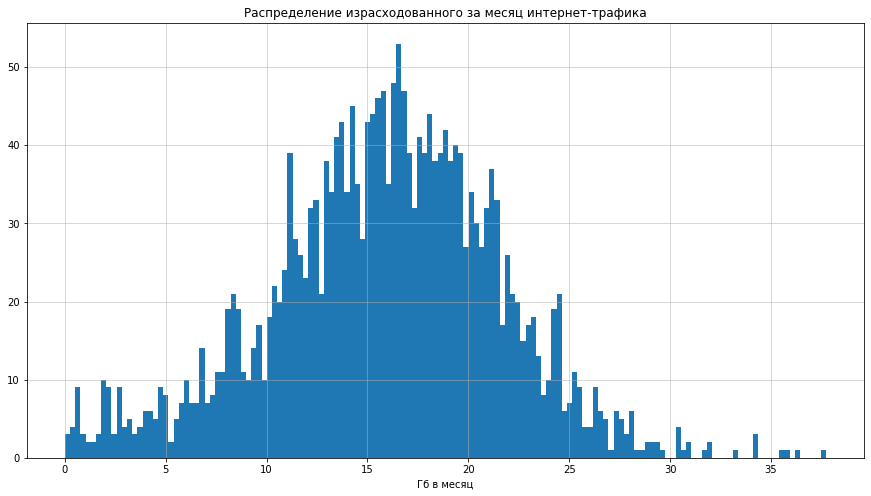

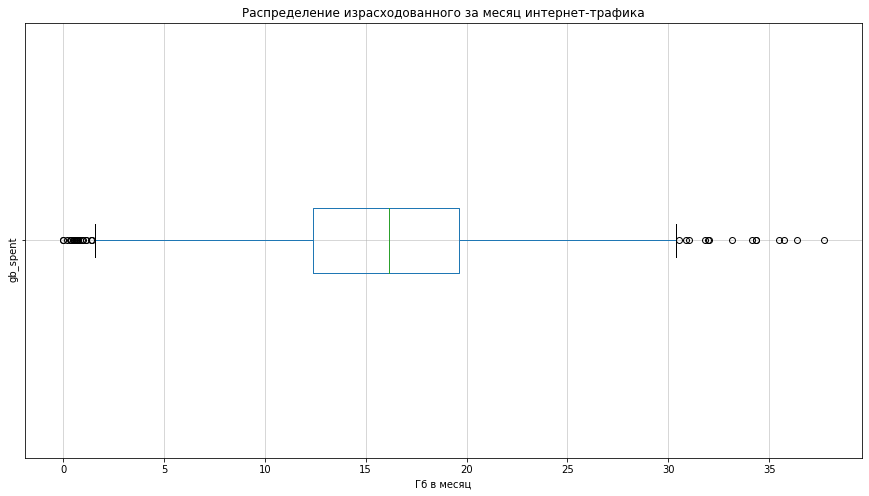

In [330]:
smart_users['gb_spent'].hist(bins=147, figsize=(15, 8))
plt.xlabel('Гб в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение израсходованного за месяц интернет-трафика')
plt.show()

smart_users.boxplot(column='gb_spent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Гб в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение израсходованного за месяц интернет-трафика')
plt.show()

In [331]:
print('Объема интернет-трафика в месяц, необходимый для удовлетворения нужд 99% клиентов - {:.2f} Гб'.format(smart_internet_mean + 3 * smart_internet_standard_deviation))

Объема интернет-трафика в месяц, необходимый для удовлетворения нужд 99% клиентов - 33.08 Гб


In [332]:
#Тариф ULTRA
#Создание столбца трафиком, переведенным в Гб
ultra_users['gb_spent'] = ultra_users['mb_spent'] / 1024
ultra_internet_mean = ultra_users['gb_spent'].mean()
print('Средний объем израсходованного за месяц интернет-трафика - {:.2f}'.format(ultra_internet_mean))
ultra_internet_variance = np.var(ultra_users['gb_spent'], ddof=1)
print('Дисперсия израсходованного за месяц интернет-трафика - {:.2f}'.format(ultra_internet_variance))
ultra_internet_standard_deviation = np.sqrt(ultra_internet_variance)
print('Стандартное отклонение израсходованного за месяц интернет-трафика - {:.2f}'.format(ultra_internet_standard_deviation))

Средний объем израсходованного за месяц интернет-трафика - 19.03
Дисперсия израсходованного за месяц интернет-трафика - 97.23
Стандартное отклонение израсходованного за месяц интернет-трафика - 9.86


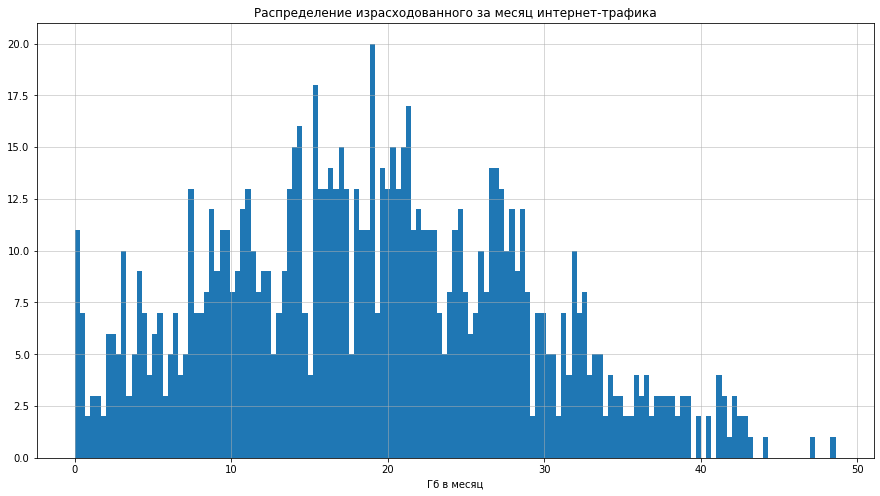

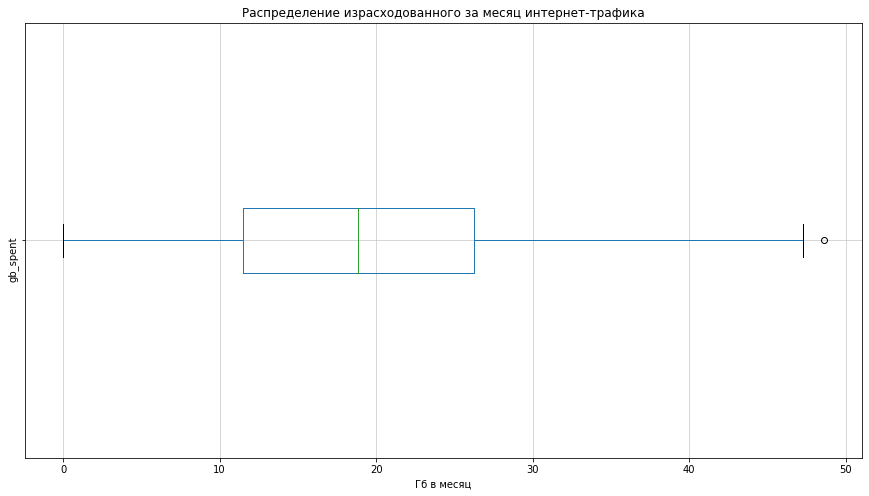

In [333]:
ultra_users['gb_spent'].hist(bins=147, figsize=(15, 8))
plt.xlabel('Гб в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение израсходованного за месяц интернет-трафика')
plt.show()

ultra_users.boxplot(column='gb_spent', vert=False, figsize=(15, 8), rot=90)
plt.xlabel('Гб в месяц');
plt.grid(linewidth=0.5)
plt.title('Распределение израсходованного за месяц интернет-трафика')
plt.show()

###Выводы.
- Звонки.
В среднем, пользователи тарифа Smart тратят 429 минут в месяц, что несколько меньше включенного пакета.  99% клиентов необходимо 1014 минут разговора, что подтверждается гистограммой распределения потраченных в месяц минут. С другой стороны, около 40% пользователей оплачивают дополнительные минуты разговоров, что приносит компании дополнительные деньги.
В среднем, пользователи тарифа Ultra тратят 540 минут в месяц, что практически в 6 раз меньше включенного пакета в 3000 минут. 99% клиентов необходимо 1518 минут разговора, что подтверждается гистограммой распределения потраченных в месяц минут. В выборке нет ни одного пользователя, который использовал хотя бы пакета в 3000 минут.
- Сообщения.
В среднем, пользователи тарифа Smart отправляют 33 сообщения в месяц, что вполне покрывается имеющиеся стандартным пакетом в 50 СМС. В среднем, пользователи тарифа Ultra отправляют 50 сообщений в месяц, что составляет всего лишь имеющегося пакета СМС. По данным обоих тарифов можно сделать вывод, что современные пользователи отправляют сравнительно небольшое количество сообщений, что объясняется переходом общения в мессенджеры.
- Траффик.
В среднем, пользователи тарифа Smart используют 16 Гб интернет-трафика в месяц, что несколько меньше включенного пакета. В среднем, пользователи тарифа Ultra используют 19 Гб интернет-трафика в месяц. Объем интернет-трафика для обоих тарифов имеет нормальное распределение. В целом можно сделать вывод, что мало кому нужно более 30 Гб интернет-трафика.

#Шаг 4. Общий вывод.
- Мы изучили наши таблицы, проверили их на наличие пустых значений, дубликатов и неправильных типов данных. После, в предобработке мы поменяли типы данных практически во всех столбцах, так как многие были указаны неверно.И подготовили все таблицы для дальнейшего анализа.

- По ТЗ: посчитали: Сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитали среднее количество, дисперсию и стандартное отклонение

- Проверили гипотезы. Убедились, что выручка тарифов Смарт и Ультра различается. Убедились, что выручка клиентов с Москвы и других регионов не отличается.

- Изучив данные, мы выявили, что клиенты тарифа Ультра расходуют больше интернет-трафика, делают больше звонков и отправляют больше сообщений, нежели клиенты тарифа Смарт и практически не превышают лимит своего пакета, чего не скажешь о клиентах тарифа Смарт. Но по годовой выручке, компания получает больше выручки по тарифу Смарт, так как пользователей данного тарифа больше чем Ультра. Если считать по каждому пользователю то в среднем пользователь тарифа Ультра приносит больше выручки в год чем, пользователь Смарта.
